#Importing Keras libraries

In [1]:
import keras

#Importing ImageDataGenerator from Keras

In [2]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#Defining the Parameters

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)


#Applying ImageDataGenerator functionality to train dataset



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


#Applying ImageDataGenerator functionality to test dataset

In [6]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


#Importing Model Building Libraries

In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

#Initializing the model

In [ ]:
model = Sequential()

#Adding CNN Layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

#Add Dense layers

In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

#configuring the learning process

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

#Training the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 29s 2s/step - loss: 1.5010 - accuracy: 0.6468 - val_loss: 0.5143 - val_accuracy: 0.7107
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 0.4046 - accuracy: 0.8096 - val_loss: 0.2090 - val_accuracy: 0.9008
Epoch 3/10
14/14 [==============================] - 21s 2s/step - loss: 0.2434 - accuracy: 0.8761 - val_loss: 0.1162 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 22s 2s/step - loss: 0.1922 - accuracy: 0.9266 - val_loss: 0.0977 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 24s 2s/step - loss: 0.2169 - accuracy: 0.9060 - val_loss: 0.0876 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 21s 1s/step - loss: 0.1833 - accuracy: 0.9289 - val_loss: 0.0855 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 21s 1s/step - loss: 0.2023 - accuracy: 0.9060 - val_loss: 0.1588 - val_accuracy: 0.9091
Epoch 8/10
14/14 [==

#Save the model

In [ ]:
model.save("forest.h5")

#Predictions

In [7]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/Dataset/Dataset/forest.h5")
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [8]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 422ms/step


1

In [9]:
if pred==0:
  print('Forest fire')
elif pred==1:
  print('No Fire')


No Fire


#Open cv for video processing

In [10]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [11]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7038 sha256=bdf12ae3285a79a8776d99e0e061f0420f61c2a2ad654e2b92eb077a87cb4baa
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [12]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound


In [13]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Creating An Account in Twilio Service

In [14]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import librosa
import IPython.display as ipd

#Sending Alert Message

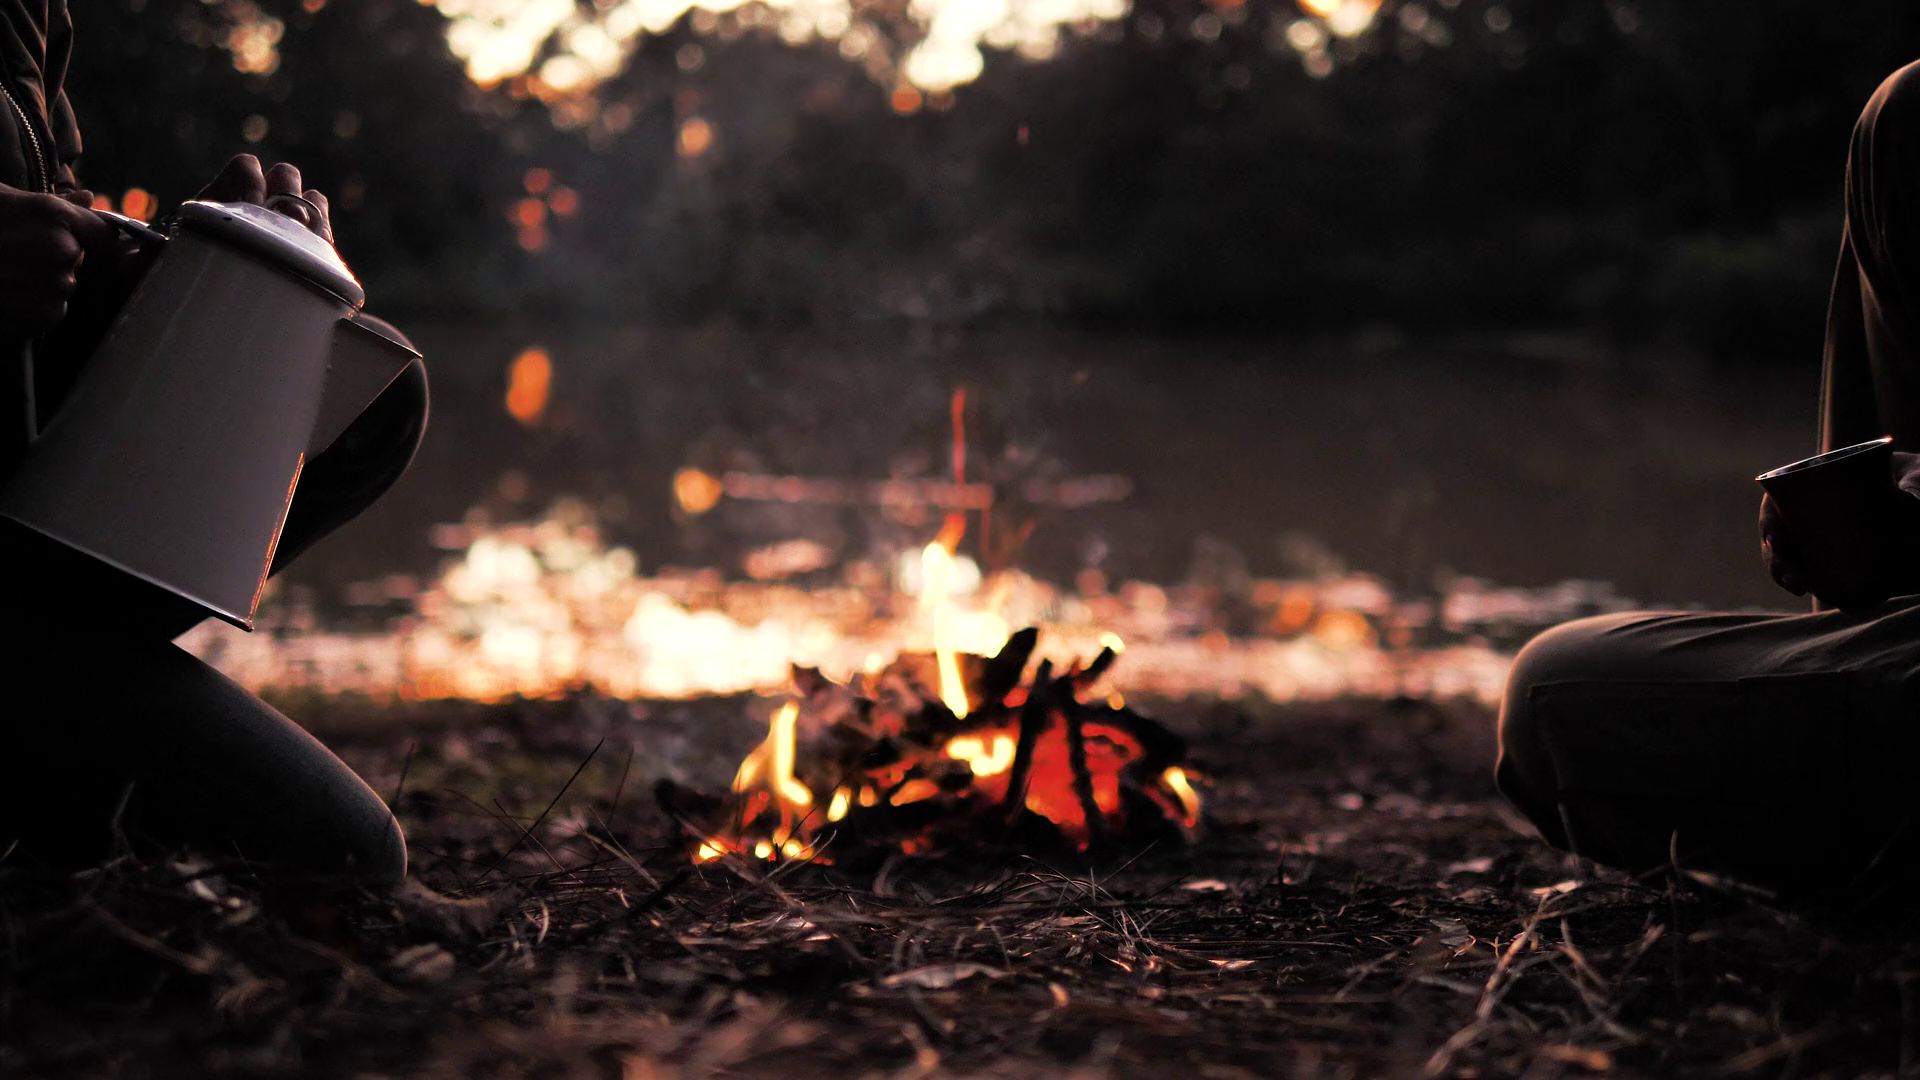

1/1 [==============================] - 0s 81ms/step
Forest fire


In [16]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Dataset/Dataset/forest 2.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    
    cv2_imshow(frame)
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/Dataset/Dataset/forest.h5")
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [17]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC0048c3e2875bd49a365b2729faab32df'
  auth_token='b221d7d5b3c6b1a4b85ea14607865d3f'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+13465675362',
      #to number
      to='+919150358042')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
SM8dbd1a63177bc480e9a6fdd8c00a4928
Fire detected
SMS Sent!
